_____________________
<h3><b>7. Dense networks</b></h3>

___________________

In [1]:
#import libraries
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline
import seaborn as sns
import tensorflow as tf #tf version is 1.12
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
import tensorflow.keras as keras
from tensorflow.keras import initializers
from tensorflow.keras import regularizers

In [2]:
with np.load('features_mobilenet_v2.npz', allow_pickle=False) as npz_file:
    #features
    X_train = npz_file['train_hl']
    X_val = npz_file['validation_hl']
    X_test = npz_file['test_hl']
    #labels
    y_train = npz_file['labels_train']
    y_val = npz_file['labels_validation']
    y_test = npz_file['labels_test']

_________________
><b>7.1. 1-layer dense network</b>

_____________

In [3]:
#define model
model_1_l = Sequential()
model_1_l.add(Dense(6, activation='softmax', input_dim=1280))

#print model
model_1_l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 7686      
Total params: 7,686
Trainable params: 7,686
Non-trainable params: 0
_________________________________________________________________


In [4]:
# create an early_stopping callback to stop the training once the loss doesn't improve for 5 epochs (5 it's arbitrary)
early_stopping = keras.callbacks.EarlyStopping(monitor='val_loss', patience=5)

In [5]:
model_1_l.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

In [6]:
history_1_l = model_1_l.fit(x=X_train, y=y_train,
                        batch_size=None,
                        validation_data=(X_val, y_val),#data on which to evaluate the loss and any model metrics at the end of each epoch
                        callbacks=[early_stopping],
                        verbose=0,#turn off the epochs printing to not overload the notebook
                        epochs=1000)

#note: the results change over each run unless PYTHONHASHSEED and all the modules seeds are specified and here are NOT.

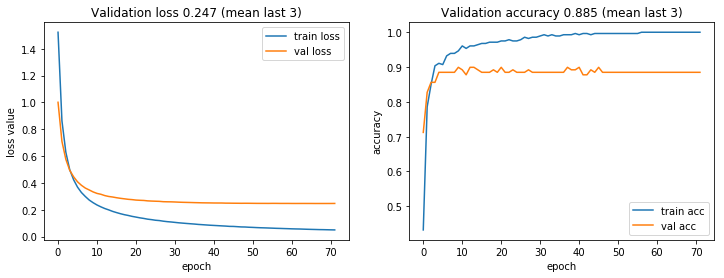

In [7]:
# Create two plots: one for the loss value, one for the accuracy
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(12, 4))

# Plot accuracy values
ax1.plot(history_1_l.history['loss'], label='train loss')
ax1.plot(history_1_l.history['val_loss'], label='val loss')
ax1.set_title('Validation loss {:.3f} (mean last 3)'.format(
    np.mean(history_1_l.history['val_loss'][-3:]) #last 3 values
))
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss value')
ax1.legend()

# Plot accuracy values
ax2.plot(history_1_l.history['acc'], label='train acc')
ax2.plot(history_1_l.history['val_acc'], label='val acc')
ax2.set_title('Validation accuracy {:.3f} (mean last 3)'.format(
    np.mean(history_1_l.history['val_acc'][-3:]) # last 3 values 
))
ax2.set_xlabel('epoch')
ax2.set_ylabel('accuracy')
ax2.legend()
plt.show()

In [8]:
#evaluate on test data
(test_loss, test_accuracy_1_l) = model_1_l.evaluate(X_test, y_test)

print('Test loss: {:.2f}'.format(test_loss))
print('accuracy 1-layer dense network: {:.2f}%'.format(test_accuracy_1_l))

50/50 [==============================] - 0s 59us/step
Test loss: 0.26
accuracy 1-layer dense network: 0.92%


In [9]:
#store the accuracy in a df
models_summary = {'model': ['1-layer nn'],
                  'test_accuracy': [test_accuracy_1_l]}
models_summary = pd.DataFrame(models_summary)

________________
><b>7.2. 2-layer dense network</b>

_________________

In [10]:
#define model
model_2_l = Sequential()
model_2_l.add(Dense(16, activation='relu', input_dim=1280))#hidden layer
model_2_l.add(Dense(6, activation='softmax'))

#print model
model_2_l.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 16)                20496     
_________________________________________________________________
dense_2 (Dense)              (None, 6)                 102       
Total params: 20,598
Trainable params: 20,598
Non-trainable params: 0
_________________________________________________________________


In [11]:
model_2_l.compile(optimizer='sgd',
                  loss='sparse_categorical_crossentropy',
                  metrics=['acc'])

In [12]:
history_2_l = model_2_l.fit(x=X_train, y=y_train,
                            batch_size=None,
                            validation_data=(X_val, y_val),#data on which to evaluate the loss and any model metrics at the end of each epoch
                            callbacks=[early_stopping],#same as the 1-layer network
                            verbose=0,#turn off the epochs printing to not overload the notebook
                            epochs=1000)

#note: the results change over each run unless PYTHONHASHSEED and all the modules seeds are specified and here are NOT.

In [13]:
#evaluate on test data
(test_loss, test_accuracy_2_l) = model_2_l.evaluate(X_test, y_test)

print('Test loss: {:.2f}'.format(test_loss))
print('accuracy 2-layer dense network: {:.2f}%'.format(test_accuracy_2_l))

50/50 [==============================] - 0s 101us/step
Test loss: 0.24
accuracy 2-layer dense network: 0.92%


In [14]:
#store the accuracy in a df
models_summary = models_summary.append({'model': '2-layer nn',
                                        'test_accuracy': test_accuracy_2_l}, ignore_index=True)
models_summary.to_csv("models_summary.csv", mode='a', index=False, header=False)#append to models_summary